In [2]:
# Increase width
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [4]:
# ENVIRONMENT VARIABLES

DATASET_PATH = 'datasets'


# IMPORTS

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

### **Capítulo 3 - Análise de dados de uma variável**

Perguntas a serem respondidas:

Qual a frequência com que cada valor (ou intervalo de valores) aparece no conjunto de dados ou seja, qual a **distribução de frequências** dos dados?

Quais são alguns valores típicos do conjunto de dados, como mínimo e máximo?

Qual seria um valor para representar a posição (ou localização) central do conjunto de dados?

Qual seria uma medida da variabilidade ou dispersãoo dos dados?

Existem valores atípicos ou discrepantes (*outliers*) no conjunto de dados?

A distribuição de frequências dos dados pode ser considerada simétrica?

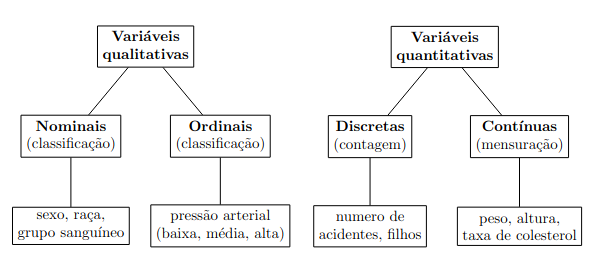

In [5]:
df_ceagfgv = pd.read_csv(f'{DATASET_PATH}/ceagfgv.csv')

In [6]:
df_ceagfgv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ident        50 non-null     int64  
 1   salario      49 non-null     float64
 2   ingles       48 non-null     object 
 3   anosformado  48 non-null     float64
 4   estcivil     50 non-null     object 
 5   filhos       50 non-null     int64  
 6   bebida       50 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


In [7]:
df_ceagfgv.head()

,ident,salario,ingles,anosformado,estcivil,filhos,bebida
0,1,3500.0,fluente,12.0,casado,1,outra alcoolica
1,2,1800.0,nenhum,2.0,casado,3,nao alcoolica
2,3,4000.0,fluente,5.0,casado,1,outra alcoolica
3,4,4000.0,fluente,7.0,casado,3,outra alcoolica
4,5,2500.0,nenhum,11.0,casado,2,nao alcoolica


In [8]:
# Distribuições de Frequências

# Variáveis qualitativas são em geral resumidas por meio dos valores das frequências absolutas e relativas (%)
# O resumo exibido nas tabelas com distribuições de frequências pode ser representado por meio de gráficos de barras ou gráficos do tipo pizza (ou torta).

# Bebida favorita
df_freq_bebida = df_ceagfgv.groupby('bebida').agg({'filhos': 'count'}).rename(columns={'filhos': 'freq_absoluta'})
df_freq_bebida['freq_relativa'] = df_freq_bebida.apply(lambda x: round(x['freq_absoluta'] / df_ceagfgv.shape[0] * 100, 2), axis=1)

# Fluência inglês
df_freq_ingles = df_ceagfgv.groupby('ingles').agg({'filhos': 'count'}).rename(columns={'filhos': 'freq_absoluta'}).sort_values('freq_absoluta')
df_freq_ingles['freq_relativa'] = df_freq_ingles.apply(lambda x: round(x['freq_absoluta'] / 48 * 100, 0), axis=1)
df_freq_ingles['freq_acumulada'] = df_freq_ingles['freq_relativa'].cumsum()

In [9]:
df_freq_bebida

,freq_absoluta,freq_relativa
bebida,,
cerveja,11,22.0
nao alcoolica,23,46.0
outra alcoolica,16,32.0


In [11]:
df_freq_ingles

,freq_absoluta,freq_relativa,freq_acumulada
ingles,,,
nenhum,2,4.0,4.0
fluente,20,42.0,46.0
algum,26,54.0,100.0


In [21]:
# Variáveis quantitativas são, em geral, resumidas por meio de intervalos pois se olhada a frequência de cada valor elas apresentariam ocorrências muito pequenas
# Os gráficos mais utilizados para visualização são dotplot, Stem and leaf e histograma
# Não criei o dotplot pois o histograma representa a mesma informação

df_ceagfgv['salario_class'] = pd.cut(df_ceagfgv['salario'], bins=5, include_lowest=True)
df_freq_sal = df_ceagfgv.groupby('salario_class').agg({'filhos': 'count'}).rename(columns={'filhos': 'freq_absoluta'})
df_freq_sal['freq_relativa'] = df_freq_sal.apply(lambda x: round(x['freq_absoluta'] / 49 * 100, 0), axis=1)
df_freq_sal['freq_acumulada'] = df_freq_sal['freq_relativa'].cumsum()
df_freq_sal

,freq_absoluta,freq_relativa,freq_acumulada
salario_class,,,
"(793.799, 2040.0]",21,43.0,43.0
"(2040.0, 3280.0]",15,31.0,74.0
"(3280.0, 4520.0]",9,18.0,92.0
"(4520.0, 5760.0]",0,0.0,92.0
"(5760.0, 7000.0]",4,8.0,100.0


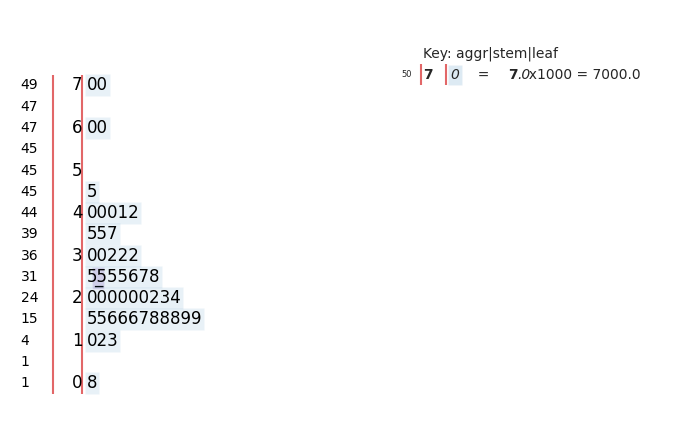

In [30]:
# Stem and leaf
# !pip install stemgraphic
import stemgraphic
stemgraphic.stem_graphic(df_ceagfgv['salario']);

# Obs: O número marcado com "_" representa a média

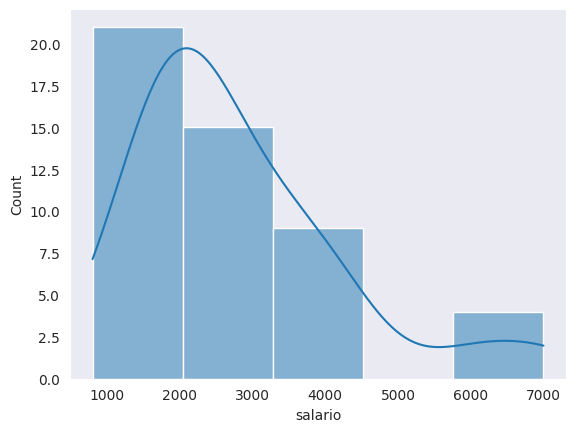

In [33]:
# Histograma
# Informações possíveis num histograma:

# Frequência absoluta nk , que corresponde ao número de elementos 
# cujos valores pertencem à classe k, k = 1, . . . , K;

# Frequência relativa fk = nk/n, que é a proporção de elementos cujos
#valores pertencem à classe k, k = 1, . . . , K;

# Densidade de frequência dk = fk/hk que representa a proporção de
#valores pertencentes à classe k por unidade de comprimento hk de cada
#classe, k = 1, . . . , K.

sns.histplot(df_ceagfgv['salario'], kde=True, bins=5);

In [54]:
df_municipios = pd.read_csv(f'{DATASET_PATH}/municipios.csv')
edges = [0, 100, 200, 250, 600, 1000]
diff = np.diff(edges)
df_municipios['class'] = pd.cut(df_municipios['populacao'], bins=edges)

# hk -> amplitude da classe
# nk -> frequência absoluta
# fk -> frequência relativa
# dk = fk/hk -> densidade de frequência
# Quanto maior for a densidade de frequência de uma classe, 
# maior será a concentração de valores nessa classe.

final_order = ['hk', 'nk', 'fk', 'dk']

df_freq_mun = (
    df_municipios.groupby('class')
    .agg({'populacao': 'count'})
    .rename(columns={'populacao': 'nk'}))

df_freq_mun['hk'] = diff

df_freq_mun['fk'] = (
    df_freq_mun.apply(lambda x: round(x['nk'] / df_municipios.shape[0], 3), axis=1))

df_freq_mun['dk'] = (
    df_freq_mun.apply(lambda x: round(x['fk'] / x['hk'], 5), axis=1))

df_freq_mun[final_order]

,hk,nk,fk,dk
class,,,,
"(0, 100]",100,17,0.567,0.00567
"(100, 200]",100,8,0.267,0.00267
"(200, 250]",50,3,0.100,0.00200
"(250, 600]",350,1,0.033,0.00009
"(600, 1000]",400,1,0.033,0.00008


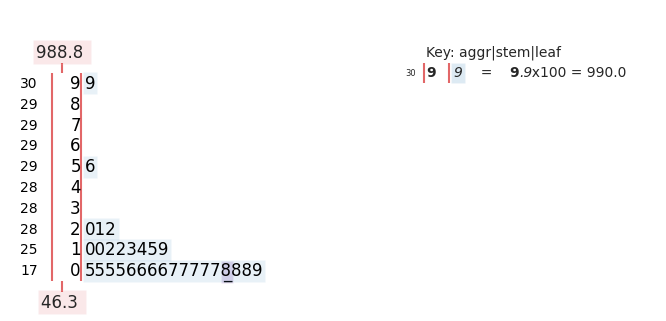

In [51]:
stemgraphic.stem_graphic(df_municipios['populacao']);